In [1]:
import folium
import pandas as pd
# from matplotlib import colormaps, colors

df = pd.read_csv('eda_clean.csv')

In [2]:
# # create map using folium with coordinates of Seattle city center
# city_center = [47.6050242, -122.3343709]
# m = folium.Map(location=city_center, control_scale=True, zoomstart=13)

# median_price = df['price'].median()

# # adding circles at house locations with color depending on house price
# for _, row in df.iterrows():
    
#     above = row['price'] >= median_price
#     if above == True:
#         color = 'blue'
#     else:
#         color = 'red'

#     # add circle
#     folium.CircleMarker(
#         location=[row['lat'], row['long']],
#         radius=2,
#         popup=f"Price: $ {row['price']:,}\nDistance Center: {round(row['dist_center'], 2)}",
#         color=color,
#         stroke=False,
#         fill=True,
#         fill_opacity=0.3
#     ).add_to(m)

# folium.Circle(
#     location=city_center,
#     radius=14003,
#     popup="Above median price",
#     color="#463FFF",
#     fill=False
# ).add_to(m)

# folium.Circle(
#     location=city_center,
#     radius=19463,
#     popup="Below median price",
#     color="#FB5454",
#     fill=False
# ).add_to(m)

# # add circle for city center
# folium.CircleMarker(
#     location=city_center,
#     radius=15,
#     popup="City Center",
#     color="black",
#     fill=True,
#     fill_opacity=0.6
# ).add_to(m)

# # showing map
# m

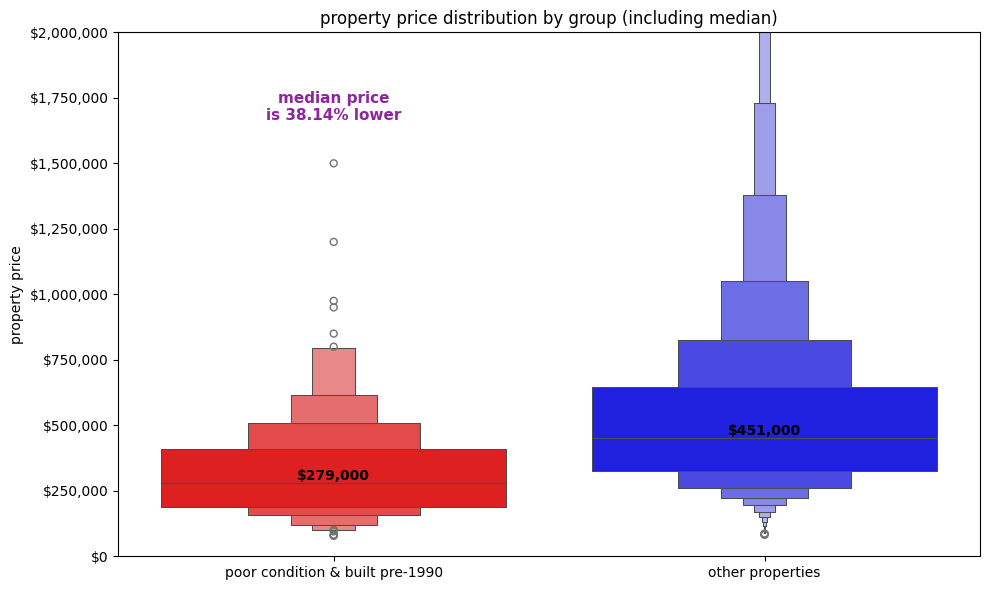

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.lines as mlines

old_poor_condition_houses = df[(df['condition'] < 3) & (df['yr_built'] < 1990)]
other_houses = df[(df['condition'] >= 3) | (df['yr_built'] >= 1990)]
old_poor_median = old_poor_condition_houses['price'].median()
other_median = other_houses['price'].median()
percentage = round((1 - (old_poor_median / other_median)) * 100, 2)

# Create a combined dataframe for plotting
df_plot = pd.concat([
    old_poor_condition_houses.assign(group='poor condition & built pre-1990'),
    other_houses.assign(group='other properties')
])

plt.figure(figsize=(10,6))

sns.boxenplot(
    data=df_plot,
    x='group', 
    y='price',
    palette=['red', 'blue'],
    hue='group',
    legend=False
)

# Format y-axis as dollars
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'${y:,.0f}'))

# Add median annotations
plt.text(
    x=0, y=old_poor_median, 
    s=f"${old_poor_median:,.0f}", 
    color='black', ha='center', va='bottom', fontweight='bold'
)

plt.text(
    x=1, y=other_median, 
    s=f"${other_median:,.0f}", 
    color='black', ha='center', va='bottom', fontweight='bold'
)

ymax = plt.gca().get_ylim()[1]
plt.text(
    x=0, y=ymax * 0.22,
    s=f"median price\nis {percentage}% lower",
    color="#8F249F", ha='center', va='top', fontsize=11, fontweight='bold'
)

plt.ylim(0, 2_000_000)  # optional: cap at $3M like before
plt.xlabel('')
plt.ylabel('property price')
plt.title(f'property price distribution by group (including median)')
plt.tight_layout()
plt.show()

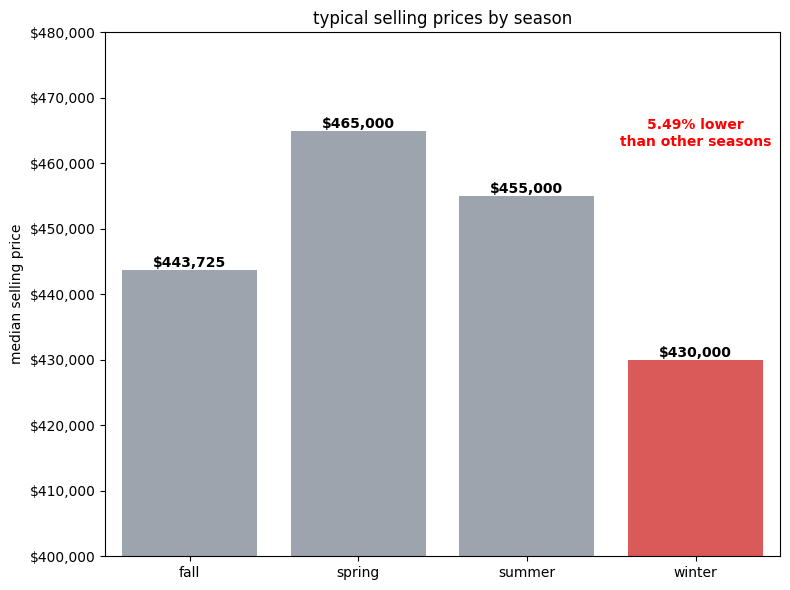

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Calculate median price per season
season_medians = df.groupby('season')['price'].median().reset_index()

# Compute percentage difference: Winter vs Other seasons
winter_median = season_medians.loc[season_medians['season'] == 'winter', 'price'].values[0]
other_median = season_medians.loc[season_medians['season'] != 'winter', 'price'].median()
percent_lower = (other_median - winter_median) / other_median * 100

# Define custom colors: highlight Winter in red, others in gray
colors = ['#EF4444' if season == 'winter' else '#9CA3AF' for season in season_medians['season']]

plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=season_medians,
    x='season', y='price',
    palette=colors,
    hue='season',
    legend=False
)

# Add value labels on top of each bar
for i, row in season_medians.iterrows():
    ax.text(
        i, row['price'], f"${row['price']:,.0f}",
        ha='center', va='bottom', fontweight='bold', color='black'
    )

# Add percentage difference annotation above Winter bar
winter_index = season_medians.index[season_medians['season'] == 'winter'][0]
ax.text(
    winter_index, winter_median * 1.075,  # a bit above Winter bar
    f"{percent_lower:.2f}% lower\nthan other seasons",
    ha='center', va='bottom', fontsize=10, fontweight='bold', color='red'
)

# Format y-axis as dollars
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'${y:,.0f}'))

plt.ylim(400_000, 480_000) 
plt.xlabel('')
plt.ylabel('median selling price')
plt.title('typical selling prices by season')
plt.tight_layout()
plt.show()